In [13]:
from scipy import misc
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import scipy
import os
import cv2

In [3]:
from PIL import *
Image

<module 'PIL.Image' from '/home/g/.local/lib/python3.6/site-packages/PIL/Image.py'>

In [4]:
version = scipy.version.version

print(version)

1.4.1


### Load list of Image files

In [5]:
relative_images_folder_path = "./VOC2007/JPEGImages"
file_list = []
files  = os.walk(relative_images_folder_path)
for filename in files:
    for file in filename[2]:
        file_list.append(f'{relative_images_folder_path}/{file}')
        
#print(file_list)
data = [(cv2.imread(fname)) for fname in file_list[0:10]]


In [7]:
data[0].shape

(375, 500, 3)

In [37]:

image_x = np.array([cv2.resize(x, dsize=( 72, 72), interpolation=cv2.INTER_CUBIC) for x in data])

image_y_mid = np.array([cv2.resize(x[0], dsize=( 144, 144), interpolation=cv2.INTER_CUBIC) for x in data])

image_y_mid = np.array([cv2.resize(x[0], dsize=( 288, 288), interpolation=cv2.INTER_CUBIC) for x in data])


In [38]:
image_x.shape

(10, 72, 72, 3)

In [46]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3,padding = 1)
        self.conv2 = nn.Conv2d(64, 64, 3,padding = 1)
        self.upsanpling = nn.UpsamplingBilinear2d(scale_factor=2)
        self.conv3 = nn.Conv2d(64, 3, 1)

    def forward(self, x):
       
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.upsanpling(x)
        x = self.conv3(x)
        return x


In [47]:
net = Net()


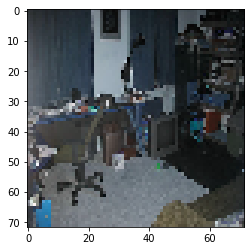

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([10, 3, 144, 144])
(10, 144, 144, 3)


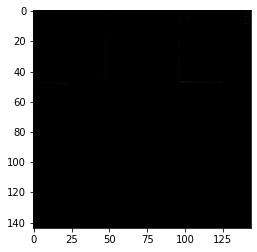

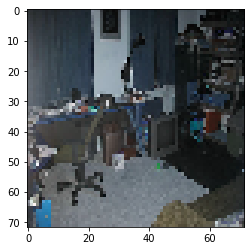

(72, 72, 3)


In [49]:
plt.imshow(image_x[0])
plt.show()
image_x1 = image_x.reshape(10, 3, 72, 72).astype(np.float32)
x_rr=torch.tensor(image_x1)
x1 = net.forward(x_rr)
print(x1.shape)
x2 = x1.detach().numpy().reshape(10, 144, 144, 3).astype(np.int32)
print(x2.shape)
plt.imshow(x2[0])
plt.show()
xx = image_x.reshape(10, 72, 72, 3)[0]
plt.imshow(xx)
plt.show()
print(xx.shape)